<a href="https://colab.research.google.com/github/mshilpaa/ethereum-data-analysis/blob/master/Malicious_Address_Prediction/Algorithms_on_Log(data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


**column 'label' has values 1 - malicious , 0 - non-malicious**

In [0]:
df = pd.read_csv('/content/gdrive/My Drive/project_data/malicious_prediction_data.csv')

In [0]:
print(df.shape)
print(df.dtypes)
df.head(5)

(534, 17)
address                      object
comment                      object
no_of_out_transactions      float64
tot_ether_sent              float64
no_of_in_transactions         int64
tot_ether_recieved          float64
monthly_out_txn             float64
monthly_in_txn              float64
active_months                 int64
eth_balance                 float64
time_b/w_out_txn            float64
time_b/w_in_txn             float64
tot_token_value_recieved    float64
tot_token_value_sent        float64
monthly_ether_sent          float64
monthly_ether_recieved      float64
label                         int64
dtype: object


,address,comment,no_of_out_transactions,tot_ether_sent,no_of_in_transactions,tot_ether_recieved,monthly_out_txn,monthly_in_txn,active_months,eth_balance,time_b/w_out_txn,time_b/w_in_txn,tot_token_value_recieved,tot_token_value_sent,monthly_ether_sent,monthly_ether_recieved,label
0,0x983bda798a24720bb4fe3dba287ec352e7b440fc,Fake BITCAR platform token,0.0,0.000000,7,0.000000,0.000000,3.5,2,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,1
1,0x45029af827c652f47b1f678456b2cd009647c8ad,Fake BITCAR platform token,0.0,0.000000,5,0.000000,0.000000,2.5,2,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,1
2,0xcc02b920ae227f1be7d01fc241c27e5f74d40436,Fake copy of ROCK2 token,0.0,0.000000,3,0.000000,0.000000,3.0,1,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000,0.000000,1
3,0x181c71726f12ce2514e8b93019eb22645a79f966,Fake Whalesburg ICO support,47.0,32.078751,28,32.101368,9.400000,7.0,5,0.000000,229893.021277,3.781516e+05,0.0,0.0,6.415750,6.420274,1
4,0x2056d2e97cc9ad78cf527b382495a8b9704ce011,Fake Whalesburg ICO support,11.0,1.076784,6,1.082241,3.666667,3.0,3,0.000143,813860.636364,1.322250e+06,0.0,0.0,0.358928,0.360747,1


In [4]:
df['comment'].value_counts()

Non Malicious                                                              267
0                                                                          142
Fake admin in Selfllery ICO                                                  8
Fake Whalesburg ICO support                                                  4
Fake PlayHall support                                                        4
                                                                          ... 
Cloned decentraland site, phishing for ETH post ICO. - decentraland.pro      1
Fake Origami Network and Crypto Cashback Rebate support                      1
PHISH_Scambots_7                                                             1
Fake MyEtherWallet                                                           1
Fake RedPulse crowdsale site (from coin.red-pulse.tech)                      1
Name: comment, Length: 102, dtype: int64

In [5]:
len(df['comment'].value_counts())

102

In [0]:
df.mean()

no_of_out_transactions      1.498427e+02
tot_ether_sent              1.859411e+03
no_of_in_transactions       6.531648e+01
tot_ether_recieved          1.873335e+03
monthly_out_txn             1.309968e+01
monthly_in_txn              1.601115e+01
active_months               5.425094e+00
eth_balance                 1.991260e+19
time_b/w_out_txn            8.846449e+05
time_b/w_in_txn             8.689263e+05
tot_token_value_recieved    1.740037e+57
tot_token_value_sent        2.170932e+17
monthly_ether_sent          1.525014e+02
monthly_ether_recieved      2.269928e+02
label                       5.000000e-01
dtype: float64

In [0]:
df.std()

no_of_out_transactions      2.486349e+03
tot_ether_sent              3.425423e+04
no_of_in_transactions       6.382657e+02
tot_ether_recieved          3.416540e+04
monthly_out_txn             1.004221e+02
monthly_in_txn              9.232221e+01
active_months               5.410799e+00
eth_balance                 2.978806e+20
time_b/w_out_txn            1.638365e+06
time_b/w_in_txn             1.970095e+06
tot_token_value_recieved    2.800965e+58
tot_token_value_sent        5.016685e+18
monthly_ether_sent          1.510494e+03
monthly_ether_recieved      1.698302e+03
label                       5.004688e-01
dtype: float64

In [0]:
df.columns

Index(['address', 'comment', 'no_of_out_transactions', 'tot_ether_sent',
       'no_of_in_transactions', 'tot_ether_recieved', 'monthly_out_txn',
       'monthly_in_txn', 'active_months', 'eth_balance', 'time_b/w_out_txn',
       'time_b/w_in_txn', 'tot_token_value_recieved', 'tot_token_value_sent',
       'monthly_ether_sent', 'monthly_ether_recieved', 'label'],
      dtype='object')

In [0]:
b = df.loc[:,'no_of_out_transactions':].copy()

In [7]:
b.columns

Index(['no_of_out_transactions', 'tot_ether_sent', 'no_of_in_transactions',
       'tot_ether_recieved', 'monthly_out_txn', 'monthly_in_txn',
       'active_months', 'eth_balance', 'time_b/w_out_txn', 'time_b/w_in_txn',
       'tot_token_value_recieved', 'tot_token_value_sent',
       'monthly_ether_sent', 'monthly_ether_recieved', 'label'],
      dtype='object')

In [0]:
# # normalization

# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X =  pd.DataFrame(sc_X.fit_transform(b.drop(["label"],axis = 1),),
#         columns=['no_of_out_transactions', 'tot_ether_sent',
#        'no_of_in_transactions', 'tot_ether_recieved', 'monthly_out_txn',
#        'monthly_in_txn', 'active_months', 'eth_balance', 'time_b/w_out_txn',
#        'time_b/w_in_txn', 'tot_token_value_recieved', 'tot_token_value_sent',
#        'monthly_ether_sent', 'monthly_ether_recieved'])

In [0]:
X = np.log1p(b.loc[:'monthly_ether_recieved'])
y = b['label']

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42,shuffle=True, stratify=y)

In [0]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

Plot of the scores for different k values

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


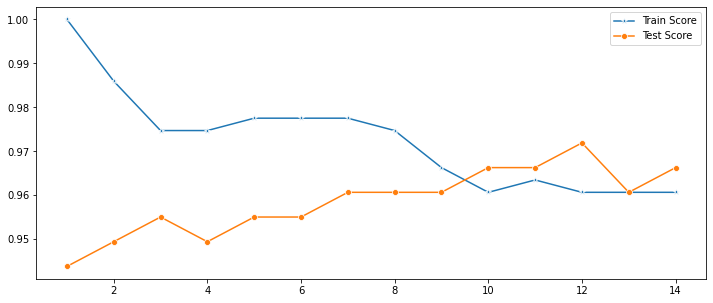

In [14]:
import seaborn as sns
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [15]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [16]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 97.19101123595506 % and k = [12]


In [0]:
def model_evaluation(y_test,y_pred):
  from sklearn.metrics import classification_report
  print(classification_report(y_test,y_pred))
  from sklearn import metrics
  cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
  p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

In [0]:
def apply_knn(k):
  #Setup a knn classifier with k neighbors
  knn = KNeighborsClassifier(k)

  knn.fit(X_train,y_train)
  print(knn.score(X_test,y_test))

  y_pred = knn.predict(X_test)
  return knn,y_pred

0.9719101123595506
              precision    recall  f1-score   support

           0       0.99      0.96      0.97        89
           1       0.96      0.99      0.97        89

    accuracy                           0.97       178
   macro avg       0.97      0.97      0.97       178
weighted avg       0.97      0.97      0.97       178



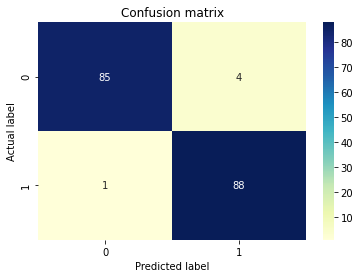

In [20]:
knn_12,y_pred_12 = apply_knn(12)
model_evaluation(y_test,y_pred_12)

In [21]:
knn_12

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [22]:
b.iloc[0]['label']

1.0

In [0]:
# knn_12.predict([np.array(b.iloc[0][:'monthly_ether_recieved'])])

# **Applying Grid Search to find best k**

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': np.arange(1, 30)} 
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(KNeighborsClassifier(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_


print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)


best params: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
best params: {'n_neighbors': 5}
best score: 0.9664919636617748


In [0]:
X_test.head(5)

,no_of_out_transactions,tot_ether_sent,no_of_in_transactions,tot_ether_recieved,monthly_out_txn,monthly_in_txn,active_months,eth_balance,time_b/w_out_txn,time_b/w_in_txn,tot_token_value_recieved,tot_token_value_sent,monthly_ether_sent,monthly_ether_recieved
377,-0.056297,-0.053504,-0.085180,-0.054051,-0.119494,-0.161664,1.031296,-0.066910,2.751855,2.244724,-0.062181,-0.043315,-0.099346,-0.132263
252,-0.043012,-0.032646,-0.097726,-0.033134,0.298026,-0.141064,-0.818593,-0.066910,-0.532068,-0.416040,-0.062181,-0.043315,0.390767,0.303750
253,-0.033350,-0.054325,-0.085180,-0.054869,-0.035167,-0.143775,0.291340,-0.066910,0.048430,0.152839,-0.062181,-0.043315,-0.101027,-0.133746
338,-0.042207,-0.054147,-0.080475,-0.054694,-0.074502,-0.135643,0.846307,-0.066759,-0.045071,0.564975,-0.062181,-0.043315,-0.100632,-0.133404
325,-0.012416,-0.053649,-0.072634,-0.054350,0.017695,-0.139257,0.476329,-0.066885,-0.427600,0.066459,-0.062181,-0.043315,-0.099116,-0.132445


In [0]:
x_set = X_test.reset_index()
y_set = y_test.reset_index()
x_set = x_set.drop('index',axis=1)
y_set = y_set.drop('index',axis=1)

In [0]:
a = []
a.append(x_set.iloc[0].values)
a

[array([-0.05629694, -0.05350428, -0.08517991, -0.05405121, -0.11949365,
        -0.16166354,  1.03129574, -0.06691027,  2.75185466,  2.24472355,
        -0.06218102, -0.04331481, -0.09934629, -0.13226329])]

In [0]:
y_set

,label
0,0
1,1
2,1
3,0
4,0
...,...
173,0
174,0
175,1
176,0


In [0]:
y_pred

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0])

In [0]:
malicious_x = []
not_malicious_x = [] 
malicious_y = []
not_malicious_y = [] 
for i in range(len(y_pred)):
  if y_pred[i] == 1:
    malicious_x.append(x_set.iloc[i].values)
    malicious_y.append(y_pred[i])

  else:
    not_malicious_x.append(x_set.iloc[i].values)
    not_malicious_y.append(y_pred[i])

In [0]:
print(len(malicious_x))
print(len(not_malicious_x)) 
print(len(malicious_y))
print(len(not_malicious_y)) 

75
103
75
103


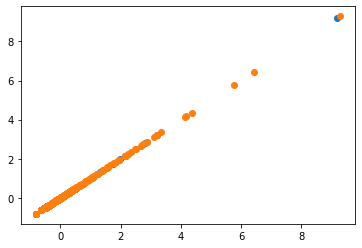

In [0]:
plt.scatter(malicious_x,malicious_x)
plt.scatter(not_malicious_x,not_malicious_x)

# **Logistic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression

In [30]:
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
clf.score(X_test, y_test)

0.8764044943820225

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        89
           1       0.86      0.90      0.88        89

    accuracy                           0.88       178
   macro avg       0.88      0.88      0.88       178
weighted avg       0.88      0.88      0.88       178



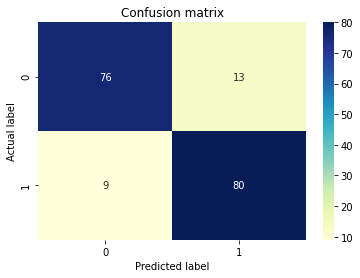

In [0]:
y_pred_lr = clf.predict(X_test)
model_evaluation(y_test,y_pred_lr)

In [0]:
# import matplotlib.pyplot as plt

# # Plot the decision boundary. For that, we will assign a color to each
# # point in the mesh [x_min, x_max]x[y_min, y_max].
# x_min, x_max = X_test[:, 0].min() - .5, X_test[:, 0].max() + .5
# y_min, y_max = X_test[:, 1].min() - .5, X_test[:, 1].max() + .5
# h = .02  # step size in the mesh
# xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# # Put the result into a color plot
# Z = Z.reshape(xx.shape)
# plt.figure(1, figsize=(4, 3))
# plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# # Plot also the training points
# plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired)


# plt.xlim(xx.min(), xx.max())
# plt.ylim(yy.min(), yy.max())
# plt.xticks(())
# plt.yticks(())

# plt.show()

In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': np.arange(1, 10, 0.1) } # C - Inverse of regularization strength - a parameter to logistic regression
scoring = {'Accuracy': 'accuracy'}

gs = GridSearchCV(LogisticRegression(random_state = 1), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')

gs.fit(X, y)
results = gs.cv_results_ # contains parameter values and corresponding accuracies for different train-test split

print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)

best params: LogisticRegression(C=3.9000000000000026, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
best params: {'C': 3.9000000000000026}
best score: 0.86701607267645


# **Classification using Multi Layer Perceptron** 

In [0]:
from sklearn.neural_network import MLPClassifier

In [32]:
mlp = MLPClassifier(solver='lbfgs', # optimiser
                    alpha=1e-5,     # L2 regularization
                    hidden_layer_sizes=(4, 15), # ( no. of layers, no. of neurons per layer )
                    random_state=1)

mlp.fit(X_train, y_train)
mlp.score(X_test,y_test)

0.9887640449438202

In [33]:
mlp = MLPClassifier(solver='sgd', alpha=0,learning_rate_init=0.035,
                     hidden_layer_sizes=(6, 20), random_state=1)

mlp.fit(X_train, y_train)
mlp.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9606741573033708

In [34]:
mlp = MLPClassifier(solver='adam', alpha=1e-5,learning_rate_init=0.0034,
                     hidden_layer_sizes=(6, 18), random_state=1)

mlp.fit(X_train, y_train)
mlp.score(X_test,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.9662921348314607

              precision    recall  f1-score   support

           0       0.99      0.94      0.97        89
           1       0.95      0.99      0.97        89

    accuracy                           0.97       178
   macro avg       0.97      0.97      0.97       178
weighted avg       0.97      0.97      0.97       178



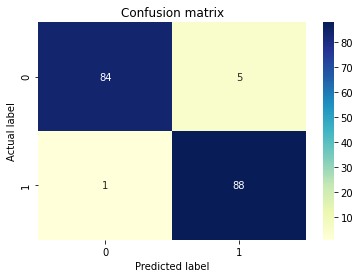

In [35]:
y_pred = mlp.predict(X_test)
model_evaluation(y_test,y_pred)

# **Random Forest Classifier**

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc = RandomForestClassifier(max_depth=5, random_state=1)
rfc.fit(X_train, y_train)
rfc.score(X_test,y_test)

1.0

In [38]:
rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        89

    accuracy                           1.00       178
   macro avg       1.00      1.00      1.00       178
weighted avg       1.00      1.00      1.00       178



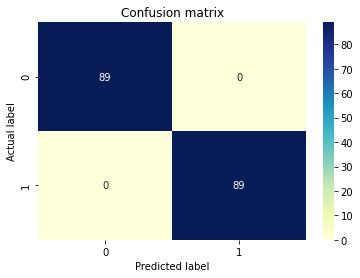

In [39]:
y_pred = rfc.predict(X_test)
model_evaluation(y_test,y_pred)